Hola **Cesar**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import lightgbm as lgb
import time

## Preparación de datos

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


In [5]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [6]:
df.duplicated().sum()

262

In [7]:
df.dropna(inplace=True) 
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245567 entries, 3 to 354367
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        245567 non-null  object
 1   Price              245567 non-null  int64 
 2   VehicleType        245567 non-null  object
 3   RegistrationYear   245567 non-null  int64 
 4   Gearbox            245567 non-null  object
 5   Power              245567 non-null  int64 
 6   Model              245567 non-null  object
 7   Mileage            245567 non-null  int64 
 8   RegistrationMonth  245567 non-null  int64 
 9   FuelType           245567 non-null  object
 10  Brand              245567 non-null  object
 11  NotRepaired        245567 non-null  object
 12  DateCreated        245567 non-null  object
 13  NumberOfPictures   245567 non-null  int64 
 14  PostalCode         245567 non-null  int64 
 15  LastSeen           245567 non-null  object
dtypes: int64(7), object(

In [9]:
target = df['Price']
features = df.drop(['DateCrawled','Price','RegistrationMonth','DateCreated','NumberOfPictures','PostalCode','LastSeen'], axis=1)

In [10]:
features

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
3,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
7,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
...,...,...,...,...,...,...,...,...,...
354360,wagon,2005,manual,3,3er,150000,gasoline,bmw,no
354362,sedan,2004,manual,225,leon,150000,petrol,seat,yes
354363,bus,2000,manual,0,zafira,150000,petrol,opel,no
354366,convertible,2000,auto,101,fortwo,125000,petrol,smart,no


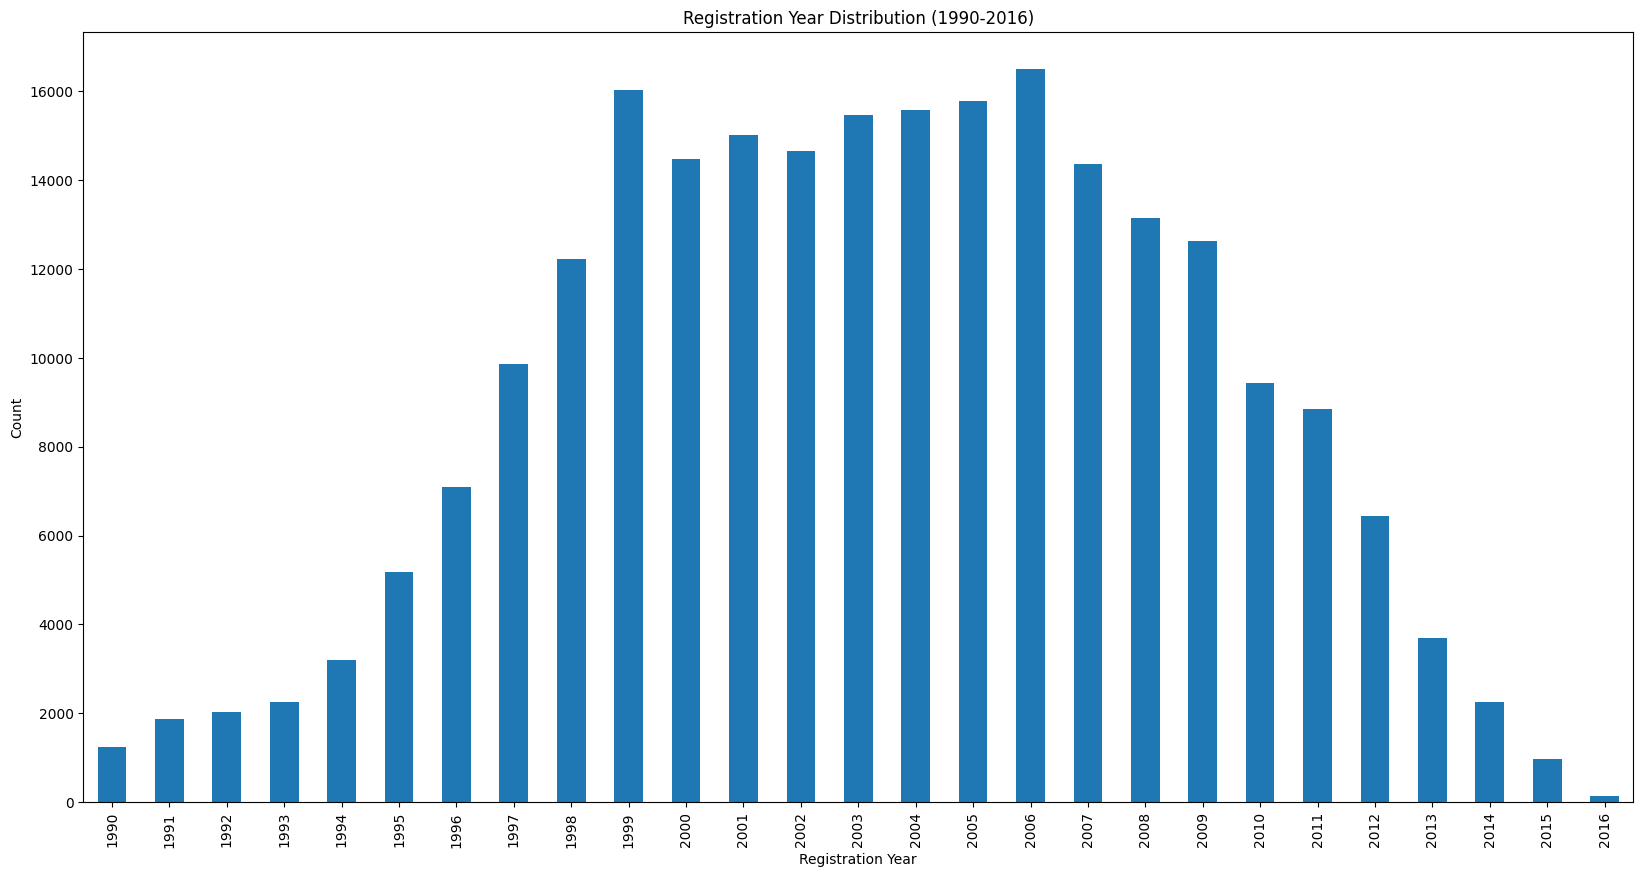

In [11]:
# Filtrar los datos para que solo incluyan años entre 1990 y 2016
filtered_df = df[(df['RegistrationYear'] >= 1990) & (df['RegistrationYear'] <= 2016)]

# Contar los años de registro y ordenarlos
registration_year_counts = filtered_df['RegistrationYear'].value_counts().sort_index()

# Graficar los resultados
plt.figure(figsize=(20, 10))
registration_year_counts.plot(kind='bar')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.title('Registration Year Distribution (1990-2016)')
plt.show()


Este grafico nos muestra un aumento de registros entre los años 1999 y 2007

In [12]:
def values(columns):
    total = features[columns].value_counts()
    return total

print(values('Gearbox'))
print()
print(values('NotRepaired'))
print()
print(values('Model'))
print()
print(values('FuelType'))
print()
print(values('Brand'))

manual    194529
auto       51038
Name: Gearbox, dtype: int64

no     217767
yes     27800
Name: NotRepaired, dtype: int64

golf                  20184
other                 18464
3er                   14877
polo                   8797
corsa                  8255
                      ...  
i3                        4
samara                    3
serie_3                   3
range_rover_evoque        2
rangerover                2
Name: Model, Length: 249, dtype: int64

petrol      162426
gasoline     78478
lpg           3903
cng            454
hybrid         180
other           73
electric        53
Name: FuelType, dtype: int64

volkswagen       51787
bmw              27213
opel             26184
mercedes_benz    23902
audi             21537
ford             17084
renault          11623
peugeot           7814
fiat              6329
seat              4903
skoda             4391
mazda             3957
citroen           3659
toyota            3619
nissan            3502
smart             33

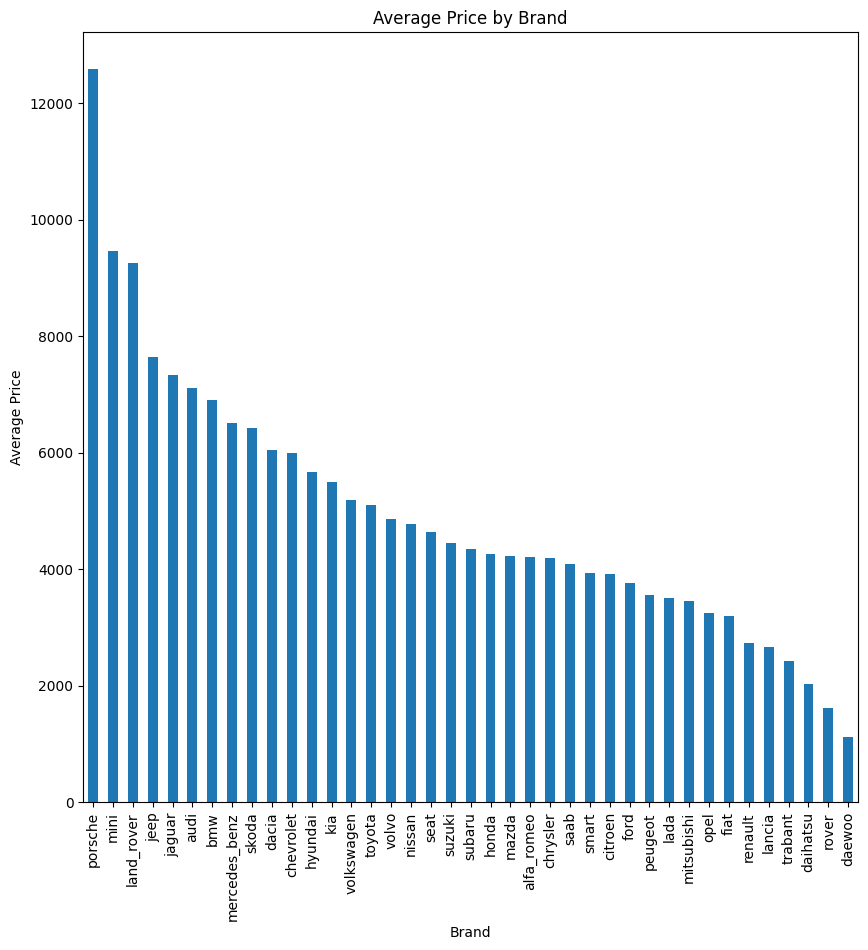

In [13]:
avg_price_by_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 10))
avg_price_by_brand.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.show()

Este grafico nos muestra que la marca puede ser un factor decisivo al momento de que un cliente tome la decision de adquirir un nuevo auto

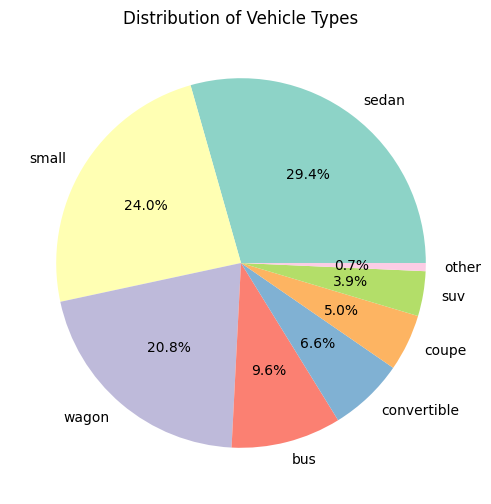

In [14]:

vehicle_type_counts = df['VehicleType'].value_counts()


plt.figure(figsize=(10, 6))
sns.set_palette("Set3")  # Set color palette for the pie chart
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Vehicle Types')


plt.show()

Este grafico de pastel nos puede brindar informacion importante y facil de entender para tener una idea clara del tipo de auto y preferencias de los clientes

In [15]:
def label(column):
    encoder = LabelEncoder() 
    df[column] = encoder.fit_transform(df[column])  

    return df[column]


vehicle_type_encoded = label('VehicleType')
brand_encoded = label('Brand')
model_encoded = label('Model')
fuel_type_encoded = label('FuelType')

features['VehicleType'] = vehicle_type_encoded
features['Brand'] = brand_encoded
features['Model'] = model_encoded
features['FuelType'] = fuel_type_encoded

In [17]:

def onehot(column):
    encoder = OneHotEncoder(sparse=False)  # Set sparse=False to get a dense array
    encoded_column = encoder.fit_transform(df[[column]])  # Pass column as a list to get a 2D array

    return encoded_column

gearbox_encoded = onehot('Gearbox')
not_repaired_encoded = onehot('NotRepaired')

features['Gearbox'] = gearbox_encoded
features['NotRepaired'] = not_repaired_encoded

In [18]:
features

,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
3,5,2001,0.0,75,116,150000,6,37,1.0
4,5,2008,0.0,69,101,90000,2,31,1.0
5,4,1995,0.0,102,11,150000,6,2,0.0
6,1,2004,0.0,109,8,150000,6,25,1.0
7,4,1980,0.0,50,166,40000,6,37,1.0
...,...,...,...,...,...,...,...,...,...
354360,7,2005,0.0,3,11,150000,2,2,1.0
354362,4,2004,0.0,225,140,150000,6,30,0.0
354363,0,2000,0.0,0,248,150000,6,24,1.0
354366,1,2000,1.0,101,106,125000,6,32,1.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el tratamiento y análisis de los datos, siempre en un proyecto lo importante es primero entender los datos con los que se trabajará antes de pasar al modelado
</div>

## Entrenamiento del modelo 

In [19]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.25,
                                                                           random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(features_train,target_train,test_size=.3,
                                                                             random_state=12345)

In [20]:
scaler = StandardScaler()
numeric = ['VehicleType', 'RegistrationYear', 'Gearbox', 'Power','Model', 'Mileage', 'FuelType', 'Brand', 'NotRepaired']
scaler.fit_transform(features_train)

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])



print(features_train[numeric])
print(features_valid[numeric])
print(features_test[numeric])

        VehicleType  RegistrationYear  Gearbox     Power     Model   Mileage  \
267550     0.347780         -0.475752 -0.51216 -0.844102 -0.465193  0.610817   
129278    -0.120902          0.173195 -0.51216 -0.106868  0.112062  0.610817   
137133     0.347780         -0.313515 -0.51216 -0.844102 -0.352558  0.610817   
214342    -0.120902         -0.637989 -0.51216 -0.036655  0.112062  0.610817   
287436     1.285144         -0.800226 -0.51216 -0.317506 -0.141367 -0.063721   
...             ...               ...      ...       ...       ...       ...   
333253     0.816462          0.335432 -0.51216  0.209090  0.816031 -1.008075   
111966    -0.120902          0.822142 -0.51216 -0.029634 -1.056527 -1.277891   
304018    -0.120902         -0.800226 -0.51216 -0.212187  0.647078  0.610817   
344155    -0.120902          0.497669 -0.51216 -0.078783 -1.056527  0.610817   
214476     1.285144         -0.151279 -0.51216  0.138877  1.731191  0.610817   

        FuelType     Brand  NotRepaired

/tmp/ipykernel_32/3020736284.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Ahora tienes los datos listos para el entrenamiento
</div>

In [21]:
model = LinearRegression()


start_time = time.time()
model.fit(features_train, target_train)
training_timelr = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timelr = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_lr = np.sqrt(mse)
r_squaredlr = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredlr)
print("RMSE:", rmse_lr)
print("Training Time:", training_timelr)
print("Prediction Time:", prediction_timelr)


R-squared: 0.4822173942973971
RMSE: 3390.838373602615
Training Time: 0.014563322067260742
Prediction Time: 0.021668195724487305


In [22]:
model = RandomForestRegressor(max_depth=35, random_state=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timerf = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timerf = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_rf = np.sqrt(mse)
r_squaredrf = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredrf)
print("RMSE:", rmse_rf)
print("Training Time:", training_timerf)
print("Prediction Time:", prediction_timerf)

R-squared: 0.8721339415361609
RMSE: 1685.043046783114
Training Time: 22.364421844482422
Prediction Time: 1.424924373626709


In [23]:
model = RandomForestRegressor(n_estimators=50,max_depth=25,random_state=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timerf2 = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timerf2 = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_rf2 = np.sqrt(mse)
r_squaredrf2 = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredrf2)
print("RMSE:", rmse_rf2)
print("Training Time:", training_timerf2)
print("Prediction Time:", prediction_timerf2)

R-squared: 0.8717958937538888
RMSE: 1687.2690052587964
Training Time: 10.986160516738892
Prediction Time: 0.668503999710083


In [24]:
model = GradientBoostingRegressor(n_estimators=50, max_depth=25, random_state=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timegb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timegb = time.time() - start_time

mse = mean_squared_error(target_valid, model_predict)
rmse_gb = np.sqrt(mse)
r_squaredgb = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredgb)
print("RMSE:", rmse_gb)
print("Training Time:", training_timegb)
print("Prediction Time:", prediction_timegb)

R-squared: 0.8244739590174359
RMSE: 1974.2590598978943
Training Time: 18.389554023742676
Prediction Time: 0.6592104434967041


In [25]:
train_data = lgb.Dataset(features_train, label=target_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 90,
    'learning_rate': 0.15,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


start_time = time.time()
model = lgb.train(params, train_data, num_boost_round=100)
training_timelgb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timelgb = time.time() - start_time

rmse_lgb = np.sqrt(mean_squared_error(target_valid, model_predict))
r_squaredlgb = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredlgb)
print("RMSE:", rmse_lgb)
print("Training Time:", training_timelgb)
print("Prediction Time:", prediction_timelgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
R-squared: 0.877524511182667
RMSE: 1649.141617906724
Training Time: 2.572542428970337
Prediction Time: 0.31082797050476074


In [26]:
model = CatBoostRegressor(iterations=200,
                          learning_rate=0.1,
                          depth=6,
                          l2_leaf_reg=3,
                          random_seed=12345)


start_time = time.time()
model.fit(features_train, target_train)
training_timecb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_valid)
prediction_timecb = time.time() - start_time

rmse_cb = np.sqrt(mean_squared_error(target_valid, model_predict))
r_squaredcb = r2_score(target_valid, model_predict)

print("R-squared:", r_squaredcb)
print("RMSE:", rmse_cb)
print("Training Time:", training_timecb)
print("Prediction Time:", prediction_timecb)


0:	learn: 4405.4882266	total: 63.1ms	remaining: 12.5s
1:	learn: 4132.8303608	total: 77.1ms	remaining: 7.64s
2:	learn: 3882.5900171	total: 90.8ms	remaining: 5.96s
3:	learn: 3669.1405734	total: 104ms	remaining: 5.11s
4:	learn: 3477.6315367	total: 118ms	remaining: 4.61s
5:	learn: 3309.3074497	total: 131ms	remaining: 4.25s
6:	learn: 3164.7321672	total: 145ms	remaining: 3.99s
7:	learn: 3040.6203055	total: 158ms	remaining: 3.79s
8:	learn: 2929.8629576	total: 171ms	remaining: 3.63s
9:	learn: 2831.3649503	total: 185ms	remaining: 3.52s
10:	learn: 2744.4125536	total: 198ms	remaining: 3.41s
11:	learn: 2669.3691905	total: 212ms	remaining: 3.32s
12:	learn: 2602.1375312	total: 225ms	remaining: 3.24s
13:	learn: 2544.2023623	total: 239ms	remaining: 3.17s
14:	learn: 2493.8871093	total: 252ms	remaining: 3.11s
15:	learn: 2445.2716350	total: 266ms	remaining: 3.06s
16:	learn: 2405.3236253	total: 279ms	remaining: 3s
17:	learn: 2371.0892054	total: 293ms	remaining: 2.96s
18:	learn: 2342.1916974	total: 305ms	r

158:	learn: 1786.5370045	total: 2.11s	remaining: 544ms
159:	learn: 1786.2165214	total: 2.12s	remaining: 531ms
160:	learn: 1785.8677536	total: 2.13s	remaining: 517ms
161:	learn: 1784.6808790	total: 2.15s	remaining: 503ms
162:	learn: 1784.1249356	total: 2.16s	remaining: 490ms
163:	learn: 1783.4228706	total: 2.18s	remaining: 478ms
164:	learn: 1782.3361948	total: 2.19s	remaining: 465ms
165:	learn: 1781.1481071	total: 2.2s	remaining: 451ms
166:	learn: 1780.6542296	total: 2.22s	remaining: 438ms
167:	learn: 1780.0797960	total: 2.23s	remaining: 425ms
168:	learn: 1779.5517632	total: 2.24s	remaining: 411ms
169:	learn: 1778.3847282	total: 2.25s	remaining: 398ms
170:	learn: 1777.7252991	total: 2.27s	remaining: 385ms
171:	learn: 1777.0316318	total: 2.28s	remaining: 372ms
172:	learn: 1776.5590592	total: 2.3s	remaining: 359ms
173:	learn: 1775.8208161	total: 2.31s	remaining: 345ms
174:	learn: 1775.3377169	total: 2.32s	remaining: 332ms
175:	learn: 1774.5500400	total: 2.33s	remaining: 319ms
176:	learn: 

## Análisis del modelo

In [27]:
modelperformance = pd.DataFrame({'model': ['LinearRegression', 'RandomForestRegressor','RandomForestRegressor 2nd Model', 'Gradient Booster Regressor',
                                           'LightGBM','CatBoostRegressor'],
              'RMSE': [rmse_lr,rmse_rf,rmse_rf2,rmse_gb,rmse_lgb,rmse_cb],
              'R2': [r_squaredlr,r_squaredrf,r_squaredrf2,r_squaredgb,r_squaredlgb,r_squaredcb],
              'Training Time': [training_timelr,training_timerf,r_squaredrf2,training_timegb,training_timelgb,training_timecb],
              'Prediction Time': [prediction_timelr,prediction_timerf,prediction_timerf2,prediction_timegb,prediction_timelgb,prediction_timecb]})

modelperformance

,model,RMSE,R2,Training Time,Prediction Time
0,LinearRegression,3390.838374,0.482217,0.014563,0.021668
1,RandomForestRegressor,1685.043047,0.872134,22.364422,1.424924
2,RandomForestRegressor 2nd Model,1687.269005,0.871796,0.871796,0.668504
3,Gradient Booster Regressor,1974.259060,0.824474,18.389554,0.659210
4,LightGBM,1649.141618,0.877525,2.572542,0.310828
5,CatBoostRegressor,1779.300239,0.857429,2.846335,0.011026


con estos resultados podemos determinar que LightGBM es el modelo más recomendado si se prioriza la precisión (RMSE) y el tiempo de predicción. Si el tiempo de entrenamiento también es un factor clave, CatBoostRegressor podría ser una opción viable.

In [28]:
train_data = lgb.Dataset(features_train, label=target_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 90,
    'learning_rate': 0.15,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


start_time = time.time()
model = lgb.train(params, train_data, num_boost_round=100)
training_timelgb = time.time() - start_time


start_time = time.time()
model_predict = model.predict(features_test)
prediction_timelgb = time.time() - start_time

rmse_lgb = np.sqrt(mean_squared_error(target_test, model_predict))
r_squaredlgb = r2_score(target_test, model_predict)

print("R-squared:", r_squaredlgb)
print("RMSE:", rmse_lgb)
print("Training Time:", training_timelgb)
print("Prediction Time:", prediction_timelgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
R-squared: 0.8771654426214248
RMSE: 1655.691565402903
Training Time: 2.548422336578369
Prediction Time: 0.4004669189453125


<p><span style="color: #0000ff;">Conclusion:<br />El proyecto comenz&oacute; con un an&aacute;lisis exploratorio de datos (EDA), centrado en identificar y manejar duplicados, valores faltantes y seleccionar las caracter&iacute;sticas relevantes para predecir la variable objetivo: el precio del veh&iacute;culo. Los valores faltantes fueron eliminados, ya que las caracter&iacute;sticas deb&iacute;an representar de manera precisa las variables que podr&iacute;an influir en el precio del veh&iacute;culo. Conservar datos incompletos o inexactos no habr&iacute;a contribuido a obtener predicciones confiables. De igual manera, los duplicados fueron eliminados, ya que el modelo no necesitaba instancias redundantes del mismo veh&iacute;culo con caracter&iacute;sticas id&eacute;nticas.Las caracter&iacute;sticas y la variable objetivo fueron analizadas m&aacute;s a fondo mediante visualizaciones como gr&aacute;ficos de pastel, gr&aacute;ficos de barras y distribuciones de series, con el prop&oacute;sito de comprender mejor los datos.</span></p>
<p><span style="color: #0000ff;">Se entrenaron y evaluaron varios modelos de aprendizaje autom&aacute;tico, incluyendo Regresi&oacute;n Lineal, Random Forest Regressor, Gradient Boosting Regressor, LightGBM y CatBoost Regressor. Tras entrenar y validar estos modelos, LightGBM demostr&oacute; el mejor rendimiento, logrando el RMSE m&aacute;s bajo. Adem&aacute;s, solo requiri&oacute; 5 segundos para el entrenamiento y menos de 1 segundo para la predicci&oacute;n, lo que lo convierte en una opci&oacute;n eficiente y precisa. Este modelo ofreci&oacute; resultados de alta calidad junto con tiempos de entrenamiento y predicci&oacute;n relativamente r&aacute;pidos.</span></p>
<!-- Comments are visible in the HTML source only -->

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, se evaluaron correctamente las métricas solicitadas, en cuanto a las métricas de desempeño de las predicciones cómo en el tiempo que toma cada una de sus etapas. El medir el tiempo es importante ya que cuando pones los modelos en producción para que puedan ser usados se suele realizar por medio de API donde se prioriza más el tiempo de predicción que la precisión cómo tal. Lo ideal es buscar siempre el balance entre buen desempeño de predicciones y de tiempo de predicción para tu modelo, sobre todo cuando va a ser usado en tiempo real.
    
Saludos!
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos